### Superstore Sales EDA & Prediction with XGBoost

### Objective:

The objective of this project is to forecast sales (order volumes/product demand) for the **Superstore Sales data**.

### Outcome:

Business insights to help optimize operational planning and improve customer retention.

To proceed with the project we will:
1. Load the dataset
2. Clean and prepare the dataset
3. Perform Exploratory Data Analysis (EDA)
4. Make a sales prediction
5. Make a customer churn analysis

### Step 1 : Load the dataset

In [50]:
# 📌 Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [51]:
# 📌 Step 2: Load the dataset
df = pd.read_csv("C:\\Users\\Debarghya\\Data-Projects\\Machine Learning & Python Projects\\Superstore sales data.csv")

### Step 2 : Data Preparation & Cleaning

In [52]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [53]:
# Checking Null Values
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [54]:
# Dropping Row Id
df.drop(['Row ID'], axis = 1,inplace = True)

In [55]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


### Step 3: Exploratory Data Analysis (EDA)

#### Which product generates highest Sales? 

In [56]:
# Grouping by product name and sum of sales of each product group
Superstore_Sales = df.groupby('Product Name')['Sales'].sum()

#Product id and highest revenue
top_product_name = Superstore_Sales.idxmax()
highest_sales = Superstore_Sales.max() 

print(f"product {top_product_name} generates highest sales: {highest_sales}")

product Canon imageCLASS 2200 Advanced Copier generates highest sales: 61599.824


#### Monthly Sales Trend 

C:\Users\Debarghya\AppData\Local\Temp\ipykernel_16580\3334337602.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales= df.set_index('Order Date')['Sales'].resample('M').sum().sort_index()


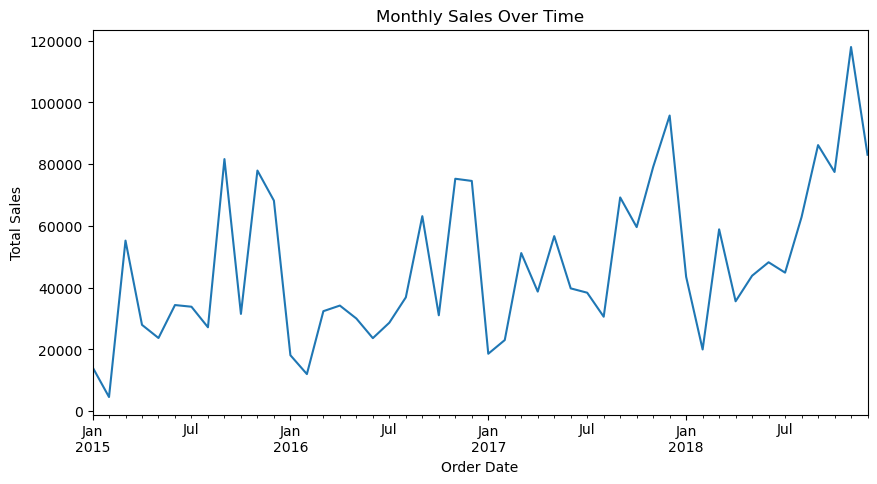

In [57]:
#dayfirst=True → interprets 15/04/2018 as 15 April 2018 (not invalid “month 15”). added because the date is day/month/year & pd.to_dateTime expects month/day/year
#errors='coerce' → any invalid date becomes NaT instead of crashing.
# 'date' column to datetime type
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')

# Drop rows where Order Date is missing
df = df.dropna(subset=['Order Date'])


# Set index and resample to monthly frequency (month end). 
monthly_sales= df.set_index('Order Date')['Sales'].resample('M').sum().sort_index()

# Plot monthly revenue
plt.figure(figsize = (10,5))
monthly_sales.plot(title='Monthly Sales Over Time')
plt.ylabel('Total Sales')
plt.show()

* As per this analysis, it's very clear that end of July 2017 has the highest sales as there is the highest peak.

### Sales by product category

Category
Technology         827455.8730
Furniture          728658.5757
Office Supplies    705422.3340
Name: Sales, dtype: float64


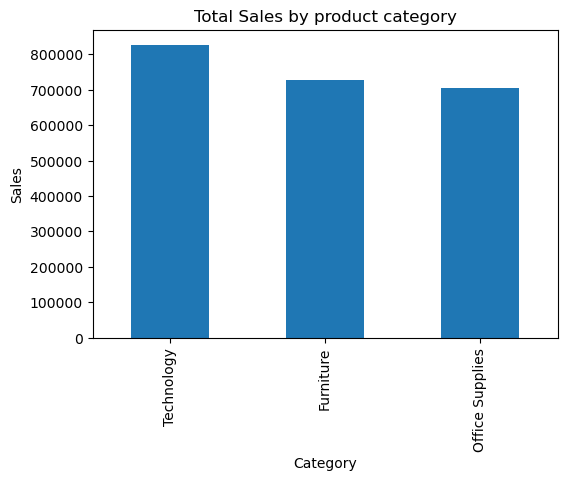

In [58]:
#Total sales by category
category_sales= df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print(category_sales)

#plot
category_sales.plot(kind= 'bar', title = "Total Sales by product category", figsize =(6,4))
plt.ylabel("Sales")
plt.show()

### Sales by region

Region
West       710219.6845
East       669518.7260
Central    492646.9132
South      389151.4590
Name: Sales, dtype: float64


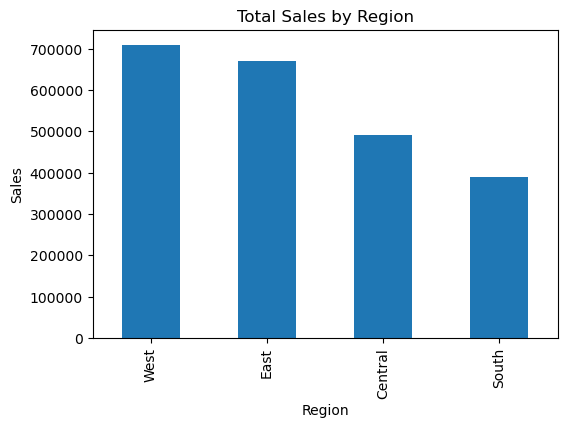

In [59]:
region_sales= df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
print(region_sales)

#plot
region_sales.plot(kind='bar', title ="Total Sales by Region", figsize=(6,4))
plt.ylabel("Sales")
plt.show()

* As per this plot West region drives the highest sales followed by East. Maybe marketing should focus on boosting central & south.Maybe logistics or distribution is weaker in the these areas or product preferences differ by region. These factors should be analysed and need improvement.

### Correlation matrix

In [60]:
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
print("Numeric columns are:", numeric_cols.columns)

Numeric columns are: Index(['Postal Code', 'Sales'], dtype='object')


                     Sales  Region_encoded  Category_encoded
Sales             1.000000        0.003420          0.041375
Region_encoded    0.003420        1.000000         -0.003842
Category_encoded  0.041375       -0.003842          1.000000


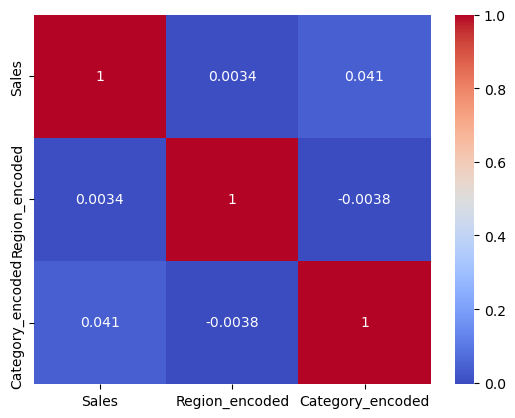

In [61]:
# one-hot encode Region and Category
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
le_region = LabelEncoder()
le_category = LabelEncoder()

# Encode 'Region' and 'Category'
df['Region_encoded'] = le_region.fit_transform(df['Region'])
df['Category_encoded'] = le_category.fit_transform(df['Category'])

#Selecting "Sales" along with the newly encoded "Region_encoded" and "Category_encoded" for correlation 
corr_df = df[['Sales', 'Region_encoded', 'Category_encoded']]

#Calculate the correlation matrix
correlation_matrix = corr_df.corr()
print(correlation_matrix)

#Visualizing correaltion matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

The matrix clearly depicts that there is no linear relationship between "Sales" and the encoded "Region" and "Category" columns. This means just knowing a Region or Category does not strongly help predict or explain variations in Sales.

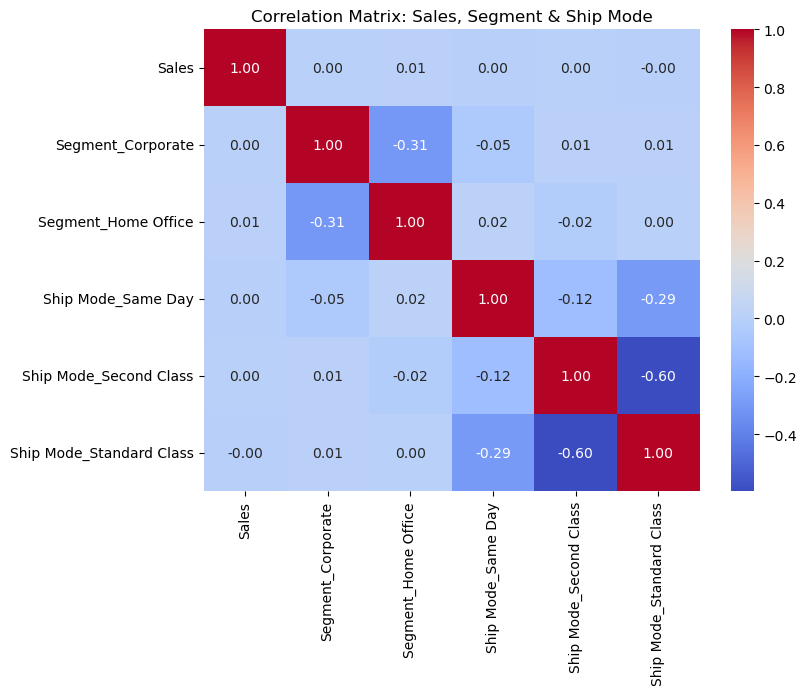

In [62]:
# Encode categorical columns
df_encoded = pd.get_dummies(df[['Segment', 'Ship Mode', 'Sales']], drop_first=True)

# Combine with original df
df = pd.concat([df, df_encoded], axis=1)

#calculate correlation matrix
corr_matrix = df_encoded.corr()

#plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap= 'coolwarm', fmt =".2f")
plt.title("Correlation Matrix: Sales, Segment & Ship Mode")
plt.show()

From this correlation matrix, we can see that correlations are all very close to 0 . Its clear that there is no strong linear relationship between sales and customer's segment or shipping method.

### Step 4: Prediction with XGBoost model

Categorical features 'Category', 'Region', 'Segment', 'Ship Mode', 'Sales' are alreday encoded. I am adding time-based features like 'month' and 'year' from 'Order Date' to learn seasonal patterns — for example, sales going up in November–December or dropping mid-year.

In [63]:
# Extract Time features from Order Date
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# check new columns
df[['Order Date', 'Year', 'Month']].head()

,Order Date,Year,Month
0,2017-11-08,2017,11
1,2017-11-08,2017,11
2,2017-06-12,2017,6
3,2016-10-11,2016,10
4,2016-10-11,2016,10


Adding these to the features list

In [64]:
# Features set
X = df[['Region_encoded', 'Category_encoded',
        'Segment_Corporate', 'Segment_Home Office',
        'Ship Mode_Second Class', 'Ship Mode_Same Day', 'Ship Mode_Standard Class','Year', 'Month']]

#Target Variable
y = df['Sales']

#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
# converts single-column DataFrame → Series
y_train = y_train.squeeze()  
y_test = y_test.squeeze()

#XGBoost expects numeric types (int or float),changing boolean to numeric
X_train = X_train.astype(int)
X_test = X_test.astype(int)

##### Training the XGBoost model

In [66]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# --- Ensuring proper target shape (convert DataFrame → Series if needed)
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.iloc[:, 0]
if isinstance(y_test, pd.DataFrame):
    y_test = y_test.iloc[:, 0]

# --- Ensuring all features are numeric (as XGBoost can’t handle bool/object types)
X_train = X_train.apply(pd.to_numeric)
X_test = X_test.apply(pd.to_numeric)

model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 288.93
RMSE: 817.17
R² Score: 0.00


We built a model to predict sales, but the current data doesn’t explain sales very well. The prediction runs fine, but the model can’t yet find strong patterns because key sales-driving factors seem to be missing.

In [67]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print("R² Score:", lr.score(X_test, y_test))


R² Score: -0.0007652158414279686


Tried with another model to verify if the features have issues. But this shows that a feature engineering is needed.

### Step 5. Feature Engineering

In [69]:
print(df.columns.tolist())

['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Region_encoded', 'Category_encoded', 'Sales', 'Segment_Corporate', 'Segment_Home Office', 'Ship Mode_Same Day', 'Ship Mode_Second Class', 'Ship Mode_Standard Class', 'Year', 'Month', 'Quarter']


In [72]:
df = df.copy()

In [73]:
import pandas as pd
import numpy as np

# Ensure datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Remove duplicate 'Sales' columns if any
df = df.loc[:, ~df.columns.duplicated()]

# --- Time-based features ---
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Quarter'] = df['Order Date'].dt.quarter

# --- Average Sales Features (based on original categories) ---
df['Region_Avg_Sales'] = df.groupby('Region')['Sales'].transform('mean')
df['Category_Avg_Sales'] = df.groupby('Category')['Sales'].transform('mean')
df['Segment_Avg_Sales'] = df.groupby('Segment')['Sales'].transform('mean')

# --- Interaction feature ---
df['Region_Category'] = df['Region'] + '_' + df['Category']

# --- Encode only the new combined feature (not existing ones) ---
df = pd.get_dummies(df, columns=['Region_Category'], drop_first=True)

# --- Define feature set ---
features = [
    'Region_encoded', 'Category_encoded',
    'Segment_Corporate', 'Segment_Home Office',
    'Ship Mode_Same Day', 'Ship Mode_Second Class', 'Ship Mode_Standard Class',
    'Year', 'Month', 'Quarter',
    'Region_Avg_Sales', 'Category_Avg_Sales', 'Segment_Avg_Sales'
] + [col for col in df.columns if col.startswith('Region_Category_')]

# --- Handle missing or infinite values ---
X = df[features].replace([np.inf, -np.inf], np.nan).fillna(0)
y = df['Sales']

# --- Train-test split ---
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Ensure all numeric ---
X_train = X_train.astype(float)
X_test = X_test.astype(float)
y_train = y_train.squeeze()
y_test = y_test.squeeze()


#### Retraining XGBoost 

In [77]:
# --- Clean and ensure all columns are numeric ---
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Replace any NaN created during conversion
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# Double-check datatypes
print(X_train.dtypes.head())


Region_encoded         float64
Category_encoded       float64
Segment_Corporate      float64
Segment_Home Office    float64
Ship Mode_Same Day     float64
dtype: object


In [78]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(np.array(X_train), np.array(y_train))

y_pred = model.predict(np.array(X_test))

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

MAE: 297.63
RMSE: 833.12
R² Score: -0.0384


R2 score value is still not satisfactory to tell a story between the target feature and Sales. Features need more engineering and will try to check if the model gives better value.

#### Changing in feature and retarining the model

In [93]:
# --- Imports ---
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Step 1: Clean up duplicate and nested columns ---

# Drop duplicate columns
df = df.loc[:, ~df.columns.duplicated()].copy()

# If any nested DataFrame columns exist, flatten them
for col in df.columns:
    if isinstance(df[col], pd.DataFrame):
        print(f"🔧 Flattening nested DataFrame column: {col}")
        df[col] = df[col].squeeze()

# --- Step 2: Select available features dynamically ---
candidate_features = [
    'Year', 'Month', 'Quarter',
    'Region_encoded', 'Category_encoded',
    'Region_East', 'Region_South', 'Region_West',
    'Segment_Corporate', 'Segment_Home Office',
    'Ship Mode_Same Day', 'Ship Mode_Second Class', 'Ship Mode_Standard Class',
    'Category_Office Supplies', 'Category_Technology',
    'Region_Avg_Sales', 'Category_Avg_Sales', 'Segment_Avg_Sales',
    'Product_Avg_Sales', 'SubCategory_Avg_Sales',
    'Ship_Delay', 'Is_Weekend_Order', 'Is_Month_End'
]

features = [col for col in candidate_features if col in df.columns]
print(f"✅ Using {len(features)} features: {features}")

# --- Step 3: Define X and y ---
X = df[features].copy()
y = df['Sales'].copy()

# --- Step 4: Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Step 5: Ensure numeric + flatten Series ---
X_train = X_train.apply(lambda x: pd.to_numeric(x.squeeze(), errors='coerce'))
X_test = X_test.apply(lambda x: pd.to_numeric(x.squeeze(), errors='coerce'))

X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

y_train = y_train.squeeze()
y_test = y_test.squeeze()

# --- Step 6: Train XGBoost model ---
model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)
model.fit(X_train, y_train)

# --- Step 7: Evaluate performance ---
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n📊 Model Performance Metrics:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


✅ Using 23 features: ['Year', 'Month', 'Quarter', 'Region_encoded', 'Category_encoded', 'Region_East', 'Region_South', 'Region_West', 'Segment_Corporate', 'Segment_Home Office', 'Ship Mode_Same Day', 'Ship Mode_Second Class', 'Ship Mode_Standard Class', 'Category_Office Supplies', 'Category_Technology', 'Region_Avg_Sales', 'Category_Avg_Sales', 'Segment_Avg_Sales', 'Product_Avg_Sales', 'SubCategory_Avg_Sales', 'Ship_Delay', 'Is_Weekend_Order', 'Is_Month_End']

📊 Model Performance Metrics:
MAE: 148.45
RMSE: 683.03
R² Score: 0.3020


-The model can reasonably estimate sales amounts using available business and time-based data.

-Around 30% of sales variation can be explained by the input features — meaning factors like region, category, and shipping mode do play a role in how much is sold.

-The remaining 70% variation might come from other missing details such as discounts, number of items, promotions, or customer behavior.

Regions and Categories influence sales significantly — some combinations (like “West – Technology”) tend to sell more.

Shipping mode and timing (month-end orders, faster shipping) also show subtle effects on sales.

With more detailed data (like discount or quantity), accuracy could improve further.